# Lab 3 : Working with Neural Networks

---


Total Points: **90**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs.

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.



In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Indian car selling platform data (say from TrueValue, CarDekho etc) for the regression problem, and for multi-class classification, we will consider Mute language Dataset. For Car Price prediction dataset refer attachted file -'train_set_CarMarketPlace.csv' and 'test_set_CarMarketPlace.csv'. For Mute disability Sign refer zip file attachted.

# Question 1


---



Section 1:  **(Total points = 40)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the car prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) **Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section**

1. Perform an exploratory analysis on the given dataset (train+test taken together). 
  1. Print the attribute names, values and label names and values.
  2. Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute. 
  3. Plot a histogram indicating the distribution of different attributes in the dataset. \\
{Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}  **(3 point)**
2. Perform data pre-processing operations like standardization and normalization.  Plot the histrograms again and note the change in histograms due to standarization. Also,  load train, test set into pandas dataframe.**(2 points)**

3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh (RELU & Linear is also allowed) activations at each layer of MLP for the user.  **( 10 points)**

4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(10 points)**

5. Train your model using the Mean Squared Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**

6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. You can try your custom values as well. **(5 points)**

7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Print the testing error. Comment on your overall observations. **(3+2 = 5 points)**

In [ ]:
#@title Importing Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#@title Mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#@title Loading the data ( test and train )
df_raw_train = pd.read_csv('drive/MyDrive/ROHAN KUMAR - train_set_CarMarketPlace (1).csv')
df_raw_test = pd.read_csv('drive/MyDrive/ROHAN KUMAR - test_set_CarMarketPlace (1).csv')
df_raw_train = df_raw_train.dropna()
df_raw_test = df_raw_test.dropna()

In [ ]:
#@title Part 1 EXPLORATORY ANALYSIS 

# Creating dataset with train and test samples together - total dataset
df_total = pd.concat([df_raw_train,df_raw_test])
df_total = df_total.dropna()

In [ ]:
#@title Attribute Names and Attribute Values
df_total[df_total.columns[:-1]]

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats
0,Lexus,2019.0,20000.0,Petrol,Automatic,First,22.37,2487.0,214.56,5.0
1,Maruti,2013.0,80000.0,CNG,Manual,Second,32.52,998.0,58.33,5.0
2,Tata,2017.0,70000.0,Diesel,Manual,First,19.09,1405.0,69.01,5.0
3,Ford,2016.0,70000.0,Diesel,Manual,Second,25.83,1498.0,99.00,5.0
4,Maruti,2016.0,81000.0,Diesel,Manual,Second,28.09,1248.0,88.50,5.0
...,...,...,...,...,...,...,...,...,...,...
1577,Audi,2014.0,230000.0,Diesel,Automatic,First,15.73,1968.0,174.33,5.0
1578,Ford,2018.0,33360.0,Diesel,Manual,First,22.77,1498.0,98.59,5.0
1579,Hyundai,2017.0,54000.0,Diesel,Manual,First,22.54,1396.0,88.73,5.0
1580,Maruti,2010.0,120000.0,Petrol,Manual,Third,19.70,796.0,35.00,8.0


In [ ]:
#@title Label Name and Values 
df_total[df_total.columns[-1:]]

,Price
0,5150000.0
1,270000.0
2,450000.0
3,350000.0
4,650000.0
...,...
1577,1200000.0
1578,925000.0
1579,850000.0
1580,130000.0


In [ ]:
#@title Finding minimum, maximum, mean and standard deviation for each attribute ( only those which have numeric values)
df_total[df_total.columns[:-1]].describe()

,Model,Odometer reading,mileage,engine,max_power,seats
count,7901.000000,7.901000e+03,7901.000000,7901.000000,7901.000000,7901.000000
mean,2013.980762,6.922319e+04,19.421449,1458.531958,91.542652,5.416656
std,3.862856,5.679331e+04,4.036465,503.994359,35.704798,0.959454
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,9.600000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [ ]:
#@title Converting string attributes to numeric values 
def str2num(df_raw):
  str_col = ['Company','fuel','transmission','owner']
  df = df_raw.copy()
  for col in str_col:
    df[col] = pd.factorize(df_raw[col])[0]
  return df
  

# Feature normalization
def feature_normalization(df):
  df_n = ((df - df.mean())/df.std())
  return df_n

In [ ]:
#@title One Hot Encoding 

df_encoded_total = pd.get_dummies(df_total, columns = ['Company','fuel','transmission','owner'])
df_encoded_total

,Model,Odometer reading,mileage,engine,max_power,seats,Price,Company_Ambassador,Company_Ashok,Company_Audi,...,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth,owner_Second,owner_Third
0,2019.0,20000.0,22.37,2487.0,214.56,5.0,5150000.0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,2013.0,80000.0,32.52,998.0,58.33,5.0,270000.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,2017.0,70000.0,19.09,1405.0,69.01,5.0,450000.0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,2016.0,70000.0,25.83,1498.0,99.00,5.0,350000.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2016.0,81000.0,28.09,1248.0,88.50,5.0,650000.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,2014.0,230000.0,15.73,1968.0,174.33,5.0,1200000.0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1578,2018.0,33360.0,22.77,1498.0,98.59,5.0,925000.0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1579,2017.0,54000.0,22.54,1396.0,88.73,5.0,850000.0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1580,2010.0,120000.0,19.70,796.0,35.00,8.0,130000.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
#@title Order of the companies in the histogram

# In the histograms the companies are assigned numbers(0,1,2...) in this order
df_total['Company'].unique()

array(['Lexus', 'Maruti', 'Tata', 'Ford', 'Honda', 'Mahindra', 'Renault',
       'Hyundai', 'Volvo', 'BMW', 'Skoda', 'Nissan', 'Chevrolet', 'Jeep',
       'Volkswagen', 'Toyota', 'Fiat', 'Land', 'Mitsubishi', 'Audi',
       'Mercedes', 'Jaguar', 'Datsun', 'Ambassador', 'Force', 'MG',
       'Ashok', 'Isuzu', 'Daewoo', 'Opel', 'Kia'], dtype=object)

In [ ]:
#@title Order of the fuels in the histogram

# In the histograms the fuels are assigned numbers(0,1,2...) in this order
df_total['fuel'].unique()

array(['Petrol', 'CNG', 'Diesel', 'LPG'], dtype=object)

In [ ]:
#@title Order of the transmissions in the histogram

# In the histograms the transmissions are assigned numbers(0,1) in this order
df_total['transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
#@title Order of the owners in the histogram

# In the histograms the owners are assigned numbers(0,1,2...) in this order
df_total['owner'].unique()

array(['First', 'Second', 'Third', 'Fourth'], dtype=object)

array([[<Axes: title={'center': 'Company'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Odometer reading'}>],
       [<Axes: title={'center': 'fuel'}>,
        <Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'owner'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>],
       [<Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

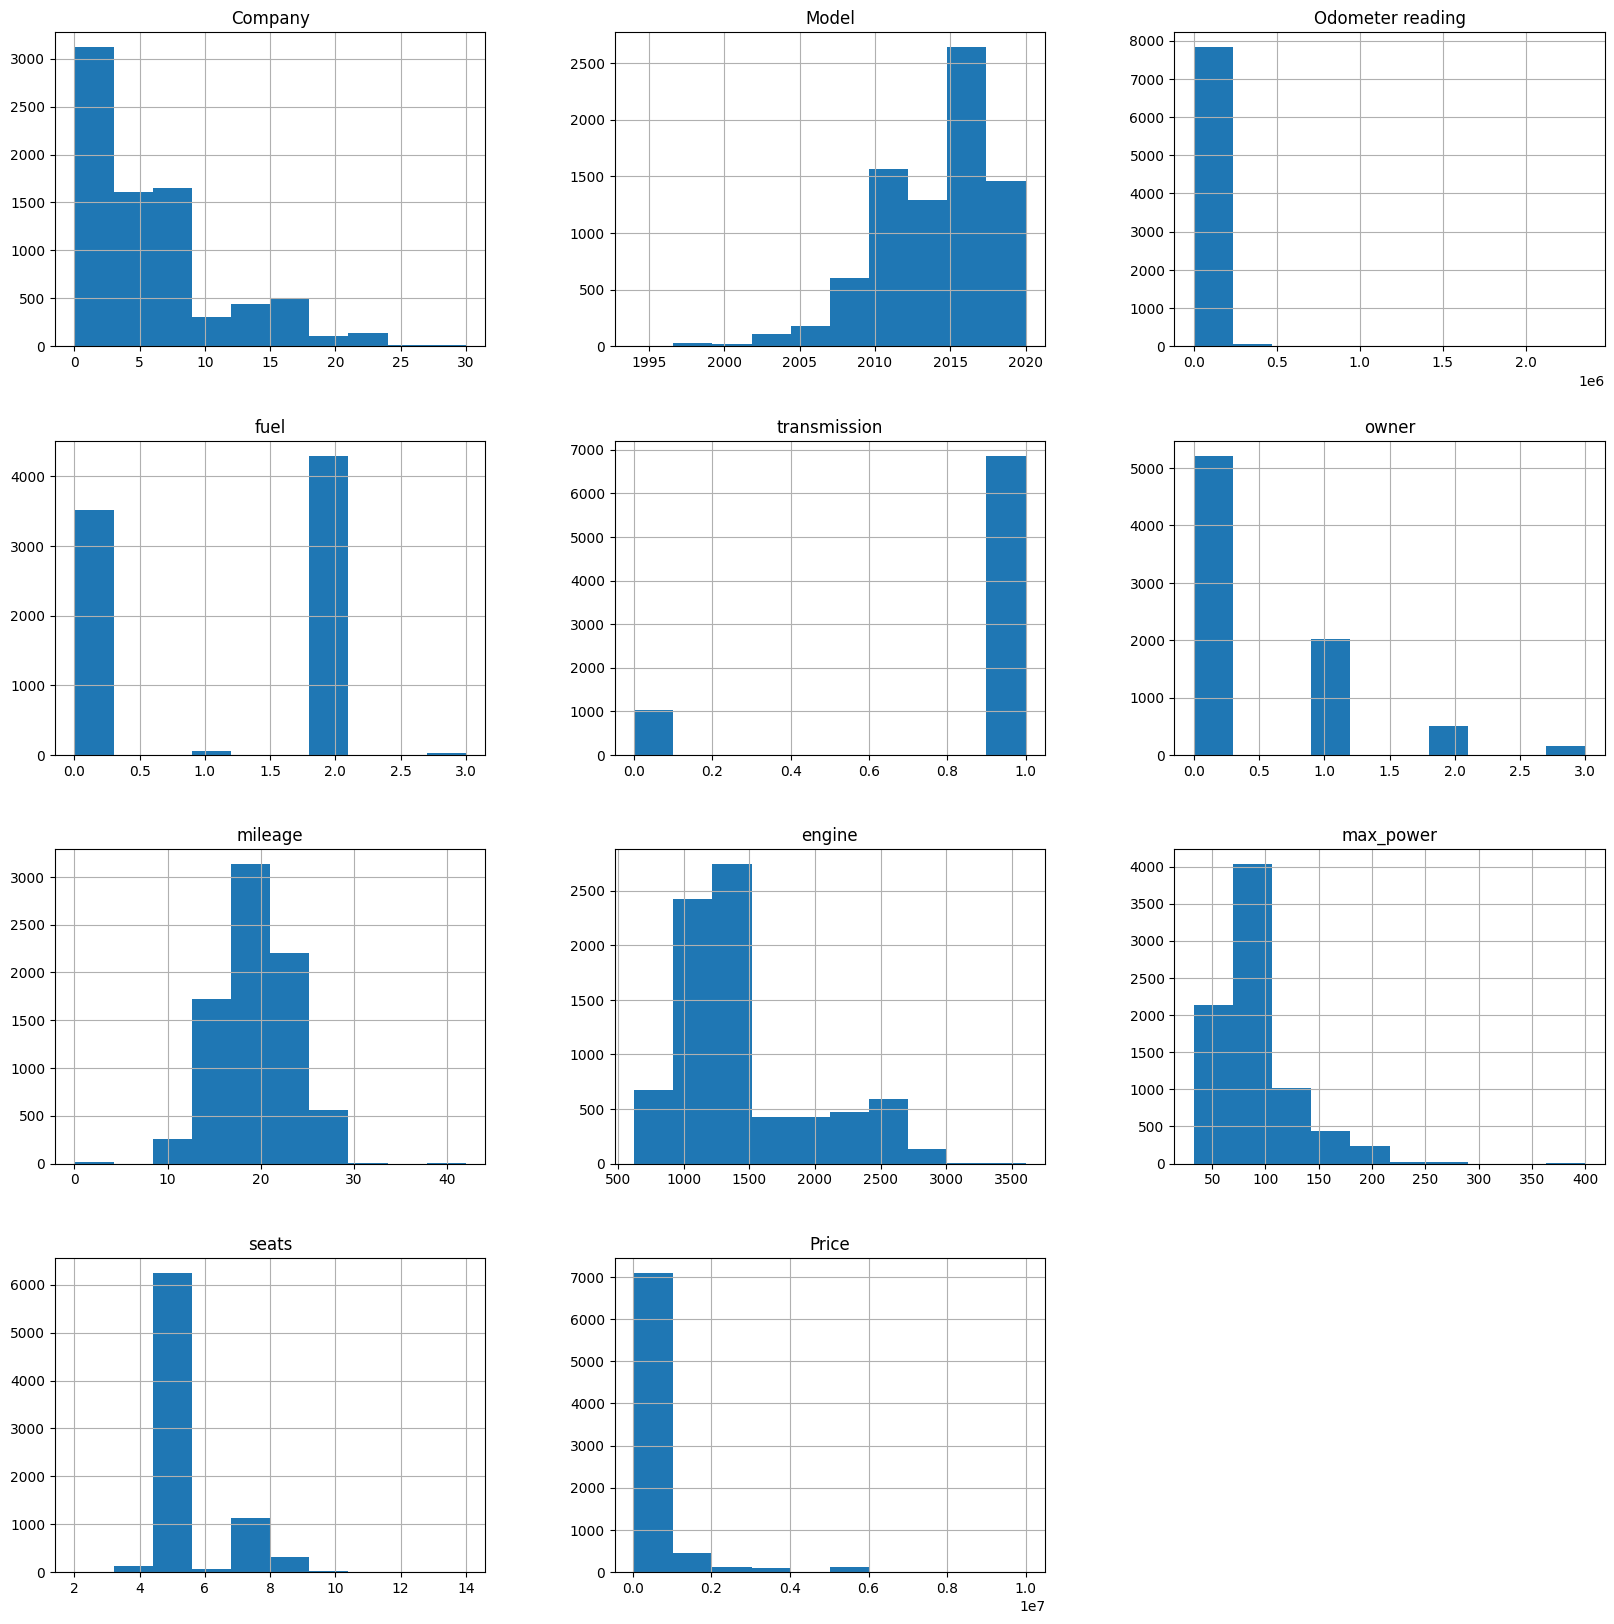

In [ ]:
#@title Histograms of the data without normalization 
# Note the alphabetical data are assigned labels in order of their first occurence in the dataframe, the order is printed above.

df_total_ = str2num(df_total)
df_total_.hist(figsize = (20,20))

array([[<Axes: title={'center': 'Company'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Odometer reading'}>],
       [<Axes: title={'center': 'fuel'}>,
        <Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'owner'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>],
       [<Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

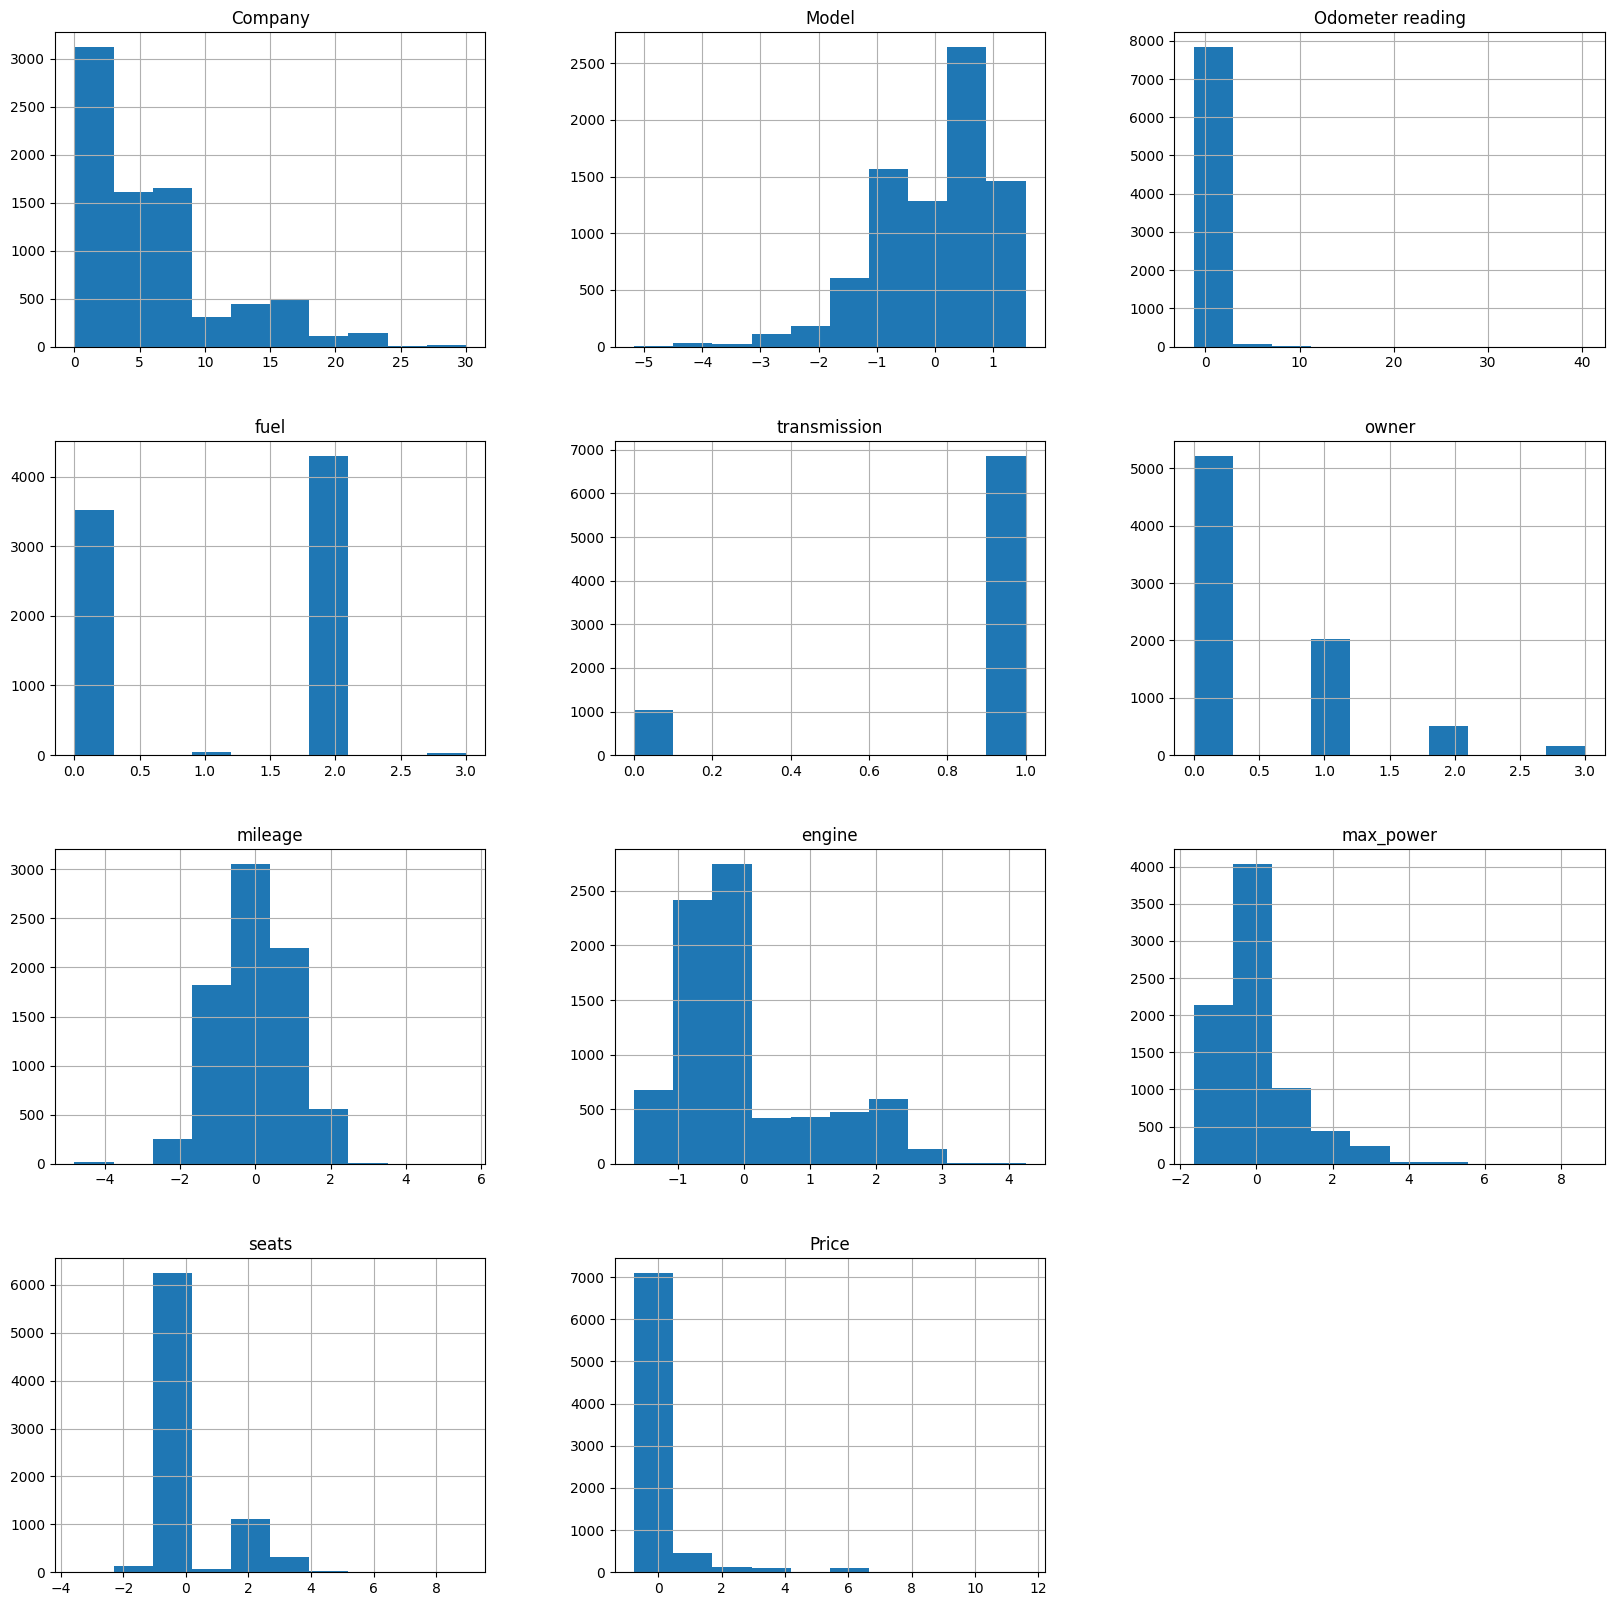

In [ ]:
#@title Q1.2 Histograms of the normalised data. We normalise only the non-categorical columns
df_total_n = df_total.copy()
df_total_num = str2num(df_total)
df_total_n = feature_normalization(str2num(df_total))
for col in ['Company','fuel','transmission','owner']:
  df_total_n[col] = df_total_num[col]
df_total_n.hist(figsize = (20,20))

Observations on Histograms: 
After standardization, we see a shift in the x-axis of the histograms. The frequency remains the same, so there is no change in the y-axis of the graph. We see that the non-categorical columns are now centred at 0 due to standardization. We did not standardize the categorical columns so no change in them. 
Overall: The shape of the histograms remains the same , but the x-axis of the non categorical attributes are now shifted such that their mean is 0 and standard deviation is 1. 


In [ ]:
#@title Describing the normalised data for confirmation
df_total_n.describe()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
count,7901.000000,7.901000e+03,7.901000e+03,7901.000000,7901.000000,7901.000000,7.901000e+03,7.901000e+03,7.901000e+03,7.901000e+03,7.901000e+03
mean,5.565625,1.720375e-14,-7.194459e-17,1.107834,0.868751,0.445007,2.940735e-16,4.001918e-17,1.492850e-16,2.931742e-16,-3.057645e-17
std,5.136802,1.000000e+00,1.000000e+00,0.997600,0.337694,0.705436,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-5.172536e+00,-1.218844e+00,0.000000,0.000000,0.000000,-4.811499e+00,-1.655836e+00,-1.645231e+00,-3.561040e+00,-7.657097e-01
25%,1.000000,-5.127714e-01,-6.025919e-01,0.000000,1.000000,0.000000,-6.543966e-01,-5.189184e-01,-6.579691e-01,-4.342636e-01,-4.680753e-01
50%,4.000000,2.638561e-01,-1.623992e-01,2.000000,1.000000,0.000000,-3.008801e-02,-4.177268e-01,-2.672653e-01,-4.342636e-01,-2.448505e-01
75%,7.000000,7.816078e-01,4.714783e-01,2.000000,1.000000,1.000000,7.180914e-01,2.449790e-01,2.928835e-01,-4.342636e-01,5.278265e-02
max,30.000000,1.558235e+00,4.034338e+01,3.000000,1.000000,3.000000,5.593645e+00,4.256929e+00,8.639101e+00,8.946067e+00,1.159847e+01


In [ ]:
#@title One Hot Encoding and normalizing training data 
df_encoded_train = pd.get_dummies(df_raw_train, columns = ['Company','fuel','transmission','owner'])
df_encoded_train
# Feature normalization
df_train = df_encoded_train.copy()
df_train[df_train.columns[:7]] = feature_normalization(df_train[df_train.columns[:7]])
df_train

,Model,Odometer reading,mileage,engine,max_power,seats,Price,Company_Ambassador,Company_Ashok,Company_Audi,...,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth,owner_Second,owner_Third
0,1.294302,-0.865671,0.736457,2.056998,3.436361,-0.425178,5.610310,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,-0.251620,0.213247,3.242790,-0.905927,-0.923179,-0.425178,-0.467976,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0.778995,0.033428,-0.073472,-0.096047,-0.625158,-0.425178,-0.243777,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0.521341,0.033428,1.590833,0.089011,0.211702,-0.425178,-0.368332,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.521341,0.231229,2.148893,-0.408458,-0.081296,-0.425178,0.005333,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,0.006034,-0.146392,-1.058720,1.444116,1.355792,1.669229,0.129888,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6320,0.263687,-0.595941,-0.194467,-0.509941,-0.267420,-0.425178,-0.056944,0,0,0,...,0,0,0,1,0,1,1,0,0,0
6321,1.036649,-0.595941,2.225441,-0.408458,-0.485356,-0.425178,0.192166,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6322,0.521341,-0.434104,1.427859,-1.301912,-1.063539,-0.425178,-0.467976,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [ ]:
#@title One Hot Encoding and normalizing testing data 
df_encoded_test = pd.get_dummies(df_raw_test, columns = ['Company','fuel','transmission','owner'])
df_encoded_test
# Feature normalization
df_test = df_encoded_test.copy()
df_test [df_test.columns[:7]] = feature_normalization(df_test[df_test.columns[:7]])
df_test

,Model,Odometer reading,mileage,engine,max_power,seats,Price,Company_Audi,Company_BMW,Company_Chevrolet,...,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth,owner_Second,owner_Third
0,0.000668,0.170995,0.146434,0.036174,-0.101177,-0.470253,-0.431857,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1.056107,-0.908870,0.010801,-0.036465,0.465899,-0.470253,0.482286,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0.792247,-0.597999,1.819238,-0.454631,-0.513337,-0.470253,-0.035728,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0.000668,0.760013,-1.649444,1.991540,0.242764,1.577874,0.116629,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.528387,-0.467107,0.462911,-0.554755,-0.254671,-0.470253,-0.096671,0,0,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0.000668,2.559788,-0.961233,0.958886,2.338528,-0.470253,0.665115,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1578,1.056107,-0.657556,0.807016,0.036174,0.185630,-0.470253,0.329929,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1579,0.792247,-0.319852,0.749246,-0.164075,-0.094639,-0.470253,0.238514,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1580,-1.054771,0.760013,0.035919,-1.342006,-1.621907,2.601937,-0.639063,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
#@title One Hot Encoding and normalizing total data 
df_encoded_total = pd.get_dummies(df_total, columns = ['Company','fuel','transmission','owner'])
df_encoded_total
# Feature normalization
df_total = df_encoded_total.copy()
df_total [df_total.columns[:7]] = feature_normalization(df_total[df_total.columns[:7]])
df_total

,Model,Odometer reading,mileage,engine,max_power,seats,Price,Company_Ambassador,Company_Ashok,Company_Audi,...,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth,owner_Second,owner_Third
0,1.299359,-0.866707,0.730478,2.040634,3.445401,-0.434264,5.583798,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,-0.253896,0.189755,3.245055,-0.913764,-0.930201,-0.434264,-0.468075,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0.781608,0.013678,-0.082114,-0.106215,-0.631082,-0.434264,-0.244850,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0.522732,0.013678,1.587664,0.078310,0.208861,-0.434264,-0.368864,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.522732,0.207363,2.147560,-0.417727,-0.085217,-0.434264,0.003177,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0.004980,2.830911,-0.914525,1.010861,2.318662,-0.434264,0.685253,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1578,1.040484,-0.631468,0.829575,0.078310,0.197378,-0.434264,0.344215,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1579,0.781608,-0.268045,0.772595,-0.124073,-0.078775,-0.434264,0.251205,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1580,-1.030523,0.894063,0.069009,-1.314562,-1.583615,2.692513,-0.641695,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
X_train = df_total.iloc[0:6320,df_total.columns!='Price'].values
y_train = df_total.iloc[:6320,df_total.columns=='Price'].values
X_test = df_total.iloc[6320:,df_total.columns!='Price'].values
y_test = df_total.iloc[6320:,df_total.columns=='Price'].values

In [ ]:
X_test.shape

(1581, 47)

In [ ]:
#@title Activation Functions

def ReLU(x): return np.maximum(0,x)
def Leaky_ReLU(x): return np.maximum(0.01*x,x)

In [ ]:
#@title Q1.3 Implementing Multi-Layer Perceptron

class Input_Layer():
  def __init__(self,n_features):
    self.n_features = n_features

  def forward(self,inputs):
    result = inputs
    self.output = result


# Define Fully connected Layer
class FCLayer():
  def __init__(self,n_inputs,n_neurons,func):
    self.weights = np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1,n_neurons))
    self.act_func = func

  # Forward Propagation
  def forward(self,inputs):
    self.net = np.dot(inputs,self.weights) + self.biases
    self.output = self.act_func(self.net)

class Output_Layer():
  def __init__(self,n_inputs,n_neurons):
    self.weights = np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1,n_neurons))

  # Forward Propagation
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases


In [ ]:
#@title ANN Class with all the layers ( Backpropagation Included )
class ANN():
  def __init__(self,Input_Layer,FCLayer,Output_Layer):
    self.l1 = Input_Layer
    self.l2 = FCLayer 
    self.l3 = Output_Layer

  # Complete Forward Pass
  def forward(self,inputs):
    self.l1.forward(inputs)
    self.l2.forward(self.l1.output)
    self.l3.forward(self.l2.output)
    self.output = self.l3.output

  # Backpropagation - To update all the w 
  def backward(self,X,y,y_pred,eta = 0.1):

    # delta for output layer
    m = y.shape[0]
    delta3 = (y_pred - y)/m

    # delta for hidden layer 
    if l2.act_func == ReLU:
      delta2 = np.dot(delta3, self.l3.weights.T) * (self.l2.output > 0)
    elif l2.act_func == Leaky_ReLU:
      delta2 = np.dot(delta3, self.l3.weights.T) * (self.l2.output > 0) + 0.1 * np.dot(delta3, self.l3.weights.T) * (self.l2.output <= 0)


    # Gradients for weights and biases

    # Output Layer
    dw2 = np.dot(self.l2.output.T,delta3)
    db2 = np.sum(delta3,axis = 0)


    # Hidden Layer 
    dw1 = np.dot(X.T,delta2)
    db1 = np.sum(delta2,axis = 0)


    # Update Parameters 
    self.l3.weights -= eta*dw2
    self.l3.biases -= eta*db2
    self.l2.weights -= eta*dw1
    self.l2.biases -= eta*db1

  def train_batch(self,X,y,eta = 0.1,epochs = 10):
    loss_plot = []
    self.forward(X)
    y_pred = self.output
    loss_plot.append(self.loss(y,y_pred))
    for i in range(epochs):
      self.forward(X)
      y_pred = self.output
      self.backward(X,y,y_pred,eta)
      if i%100 == 0:
        print('Epoch:', i + 1)
        print('Loss:', self.loss(y,y_pred))
      loss_plot.append(self.loss(y,y_pred))
    return loss_plot

  def train_stochastic(self,X,y,eta = 0.1,epochs = 10):
    loss_plot = []
    self.forward(X)
    y_pred = self.output
    loss_plot.append(self.loss(y,y_pred))
    for i in range(epochs):
      for j in range(X.shape[0]):
        self.forward(X[j:j + 1])
        y_pred = self.output
        self.backward(X[j:j + 1],y[j:j + 1],y_pred,eta)
        
         
      # Adding epoch loss to loss list
      self.forward(X)
      y_pred = self.output
      loss_plot.append(self.loss(y,y_pred))
      if i%100 == 0:
        print('Epoch:', i + 1)
        print('Loss:',loss_plot[-1])
    return loss_plot

  def loss(self,y,y_pred): # MSE LOSS 
    return np.mean(np.square(y - y_pred))


In [ ]:
#@title Creating our Model - Defining the layers


l1 = Input_Layer(47)
l2 = FCLayer(47,15,ReLU) # To change activation, put Leaky_ReLU instead of ReLU
l3 = Output_Layer(15,1)

model = ANN(l1,l2,l3)

Below we have Leaky ReLU vs RELU for SGD 

Parameters: Learning Rate = 0.001, Epochs = 100

In [ ]:
#@title  Batch Gradient Descent (Batch Size = Training Set)

# Model for ReLU
l1 = Input_Layer(47)
l2 = FCLayer(47,15,ReLU)
l3 = Output_Layer(15,1)
model = ANN(l1,l2,l3)
loss_plot1 = model.train_stochastic(X_train,y_train,eta = 0.001,epochs = 100)
# For finding test error
model.forward(X_test)
y_pred = model.output
mse_test1 = model.loss(y_test,y_pred)


# Model for Leaky ReLU
l1 = Input_Layer(47)
l2 = FCLayer(47,15,Leaky_ReLU)
l3 = Output_Layer(15,1)

model = ANN(l1,l2,l3)
loss_plot2 = model.train_stochastic(X_train,y_train,eta = 0.001,epochs = 100)
model.forward(X_test)
y_pred = model.output
mse_test2 = model.loss(y_test,y_pred)


Epoch: 1
Loss: 0.3246344381975906
Epoch: 1
Loss: 0.5772854239692827


In [ ]:
#@title Test Errors in Batch Gradient Descent 
print('Test Error for ReLU is:', mse_test1)
print('Test Error for Leaky ReLU is:', mse_test2)

Test Error for ReLU is: 0.061462911569521064
Test Error for Leaky ReLU is: 0.07362021559897892


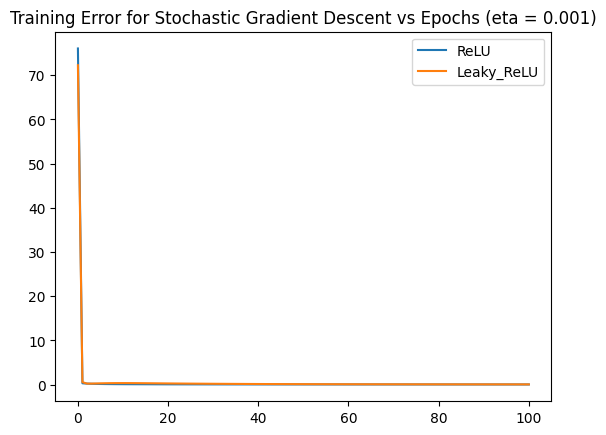

In [ ]:
#@title Plotting SGD for ReLU and Leaky_ReLU
plt.plot(loss_plot1,label = 'ReLU')
plt.plot(loss_plot2,label = 'Leaky_ReLU')
plt.title('Training Error for Stochastic Gradient Descent vs Epochs (eta = 0.001)')
plt.legend()
plt.show()

Above, we can see that we get the same results for both ReLU and Leaky ReLU

Below we compare Batch Gradient Descent and Stochastic Gradient

Parameters: Learning Rate = 0.001, Epochs = 500

Note: We have 47 Inputs as after One-Hot Encoding we get 47 attributes.


In [ ]:
#@title Q1.5 Plotting loss for Batch Gradient Descent and Stochastic Gradient Descent 

l1 = Input_Layer(47)
l2 = FCLayer(47,15,ReLU)
l3 = Output_Layer(15,1)
model = ANN(l1,l2,l3)
loss_plot1 = model.train_stochastic(X_train,y_train,eta = 0.001,epochs = 500)
model.forward(X_test)
y_pred = model.output
mse_test1 = model.loss(y_test,y_pred)

l1 = Input_Layer(47)
l2 = FCLayer(47,15,ReLU)
l3 = Output_Layer(15,1)
model = ANN(l1,l2,l3)
loss_plot2 = model.train_batch(X_train,y_train,eta = 0.001,epochs = 500)
model.forward(X_test)
y_pred = model.output
mse_test2 = model.loss(y_test,y_pred)


Epoch: 1
Loss: 0.3214156061017972
Epoch: 101
Loss: 0.04868440001647435
Epoch: 201
Loss: 0.04306524873299397
Epoch: 301
Loss: 0.040988126352221196
Epoch: 401
Loss: 0.0395218093256648
Epoch: 1
Loss: 58.361925272942
Epoch: 101
Loss: 5.879933698785108
Epoch: 201
Loss: 3.9910931748653478
Epoch: 301
Loss: 3.2438378119946356
Epoch: 401
Loss: 2.7774878275437365


In [ ]:
#@title Test Errors for SGD and Batch Gradient Descent 
print('Test Error for Stochastic Gradient Descent is:', mse_test1)
print('Test Error for Batch Gradient Descent is:', mse_test2)

Test Error for Stochastic Gradient Descent is: 0.046638606873565344
Test Error for Batch Gradient Descent is: 2.2650131252380494


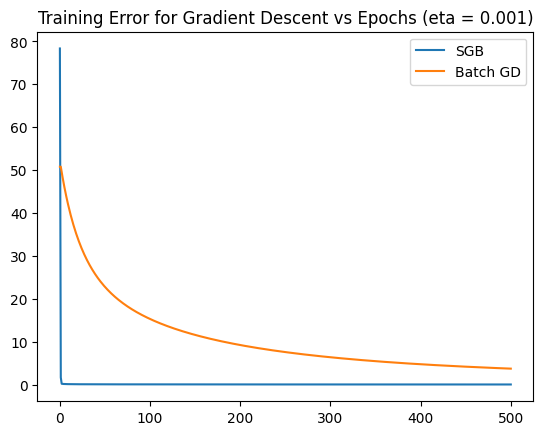

In [ ]:
#@title Plotting loss for SGD and Batch GD
plt.plot(loss_plot1,label = 'SGB')
plt.plot(loss_plot2,label = 'Batch GD')
plt.title('Training Error for Gradient Descent vs Epochs (eta = 0.001)')
plt.legend()
plt.show()

From above graph we can see that SGD converges much faster than Batch Gradient Descent vs Epochs. Hence we deem it to be the better method.

In [ ]:
#@title Q1.6 SGD for different learning rates


learning_rates = [0.01,0.005,0.001,0.0001]
loss_plots = []
test_errors = []
for lr in learning_rates:
  l1 = Input_Layer(47)
  l2 = FCLayer(47,15,ReLU)
  l3 = Output_Layer(15,1)
  model = ANN(l1,l2,l3)
  loss_plots.append(model.train_stochastic(X_train,y_train,eta = lr,epochs = 101))
  model.forward(X_test)
  y_pred = model.output
  test_errors.append(model.loss(y_test,y_pred))

Epoch: 1
Loss: 0.5330704752299655
Epoch: 101
Loss: 0.032616950215666025
Epoch: 1
Loss: 0.8110703436189789
Epoch: 101
Loss: 0.032031184398061296
Epoch: 1
Loss: 0.3792972695293645
Epoch: 101
Loss: 0.05850990569122416
Epoch: 1
Loss: 2.626534083652173
Epoch: 101
Loss: 0.12603448564813488


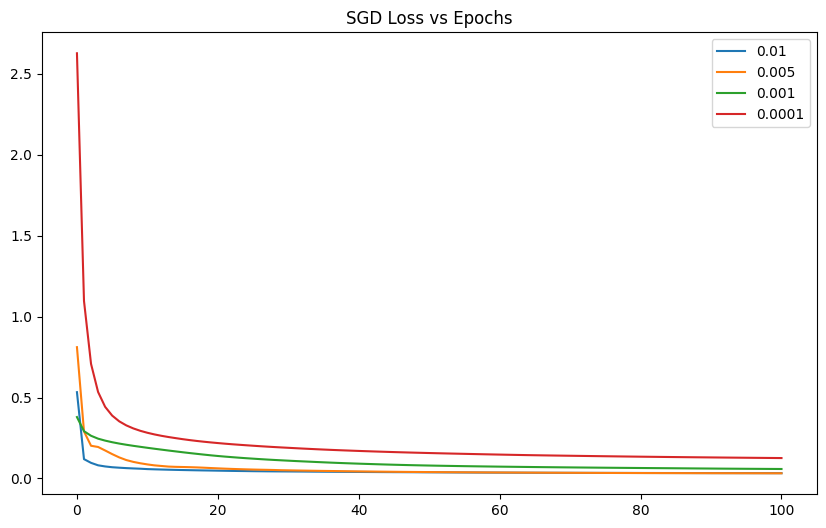

In [ ]:
#@title Q1.7 Plotting SGD Loss for different learning rates
plt.figure(figsize=(10,6))
plt.title('SGD Loss vs Epochs')
for i in range(len(learning_rates)):
  plt.plot(loss_plots[i][1:], label = str(learning_rates[i]))
plt.legend()
plt.show()

From above plot we can observe that, the error reduces faster for bigger learning rates. However after trying with different learning rates, I observed that the process is unstable for learning rates greater than 0.01

In [ ]:
#@title Losses of each learning rate 
for i in range(len(learning_rates)):
  print('For learning rate:',learning_rates[i], 'test loss is:', test_errors[i])

For learning rate: 0.01 test loss is: 0.03575709245192309
For learning rate: 0.005 test loss is: 0.04061153169590143
For learning rate: 0.001 test loss is: 0.06383365598549706
For learning rate: 0.0001 test loss is: 0.12972129446257738


# Question 2


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Mute signs using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each class. **(2 points)**

2. Plot the distribution of number of images in each class. Is the distribution uniform? Comment. **(2+1 points)**

3. Process the dataset through the [Canny Edge detection](https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e) and display the feature map for one example from each class. **(5 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(7 points)**
*  Input layer
*  Con2D with 32 neurons 3x3 kernals and ReLU activation. 
*  Con2D with 32 neurons 3x3 kernals and ReLU activation with batch normalization. 
*  Max Pooling layer with pool-size 2x2 and padding as 'valid'. 
*  Con2D with 32 neurons 3x3 kernals and relu activation and strides 2.
*  Con2D with 24 neurons 3x3 kernals and ReLU activation. 
*  Batch normalization
*  Max Pooling layer with size 2x2 and 'valid' as padding
*  Con2D with 24 neurons 3x3 kernals and ReLU activation and stride 2. 
*  Con2D with 16 neurons 3x3 kernals and ReLU activation and followed by Batch normalization.
*  Max Pooling layer with size 2x2 and 'valid' as padding.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Dropout of 30% ie. 0.3 
*  Global Average pooling 2D layer
*  Fully Connected Dense Layer with number of classes neurons and softmax activation.

3. Implement using cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. Bonus points for custom implementation of cross entropy loss function. **(5 points + 5 bonus points)**

4. Compile and train your model with four different optimizers viz. SGD,
RMSprop, Adam,\& Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**. Add early stopping with (min_delta=0.01, patience=2) while compiling and training your model. **(3points)**.

   NOTE: You can try to find best learning rate from following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and loss function wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**



In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns

tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
#@title Importing Libraries


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import random

At this point, we upload the zip files of the three datasets to colab.

In [ ]:
#@title Extracting datasets from zipped files

from zipfile import ZipFile

with ZipFile('/content/ROHAN KUMAR - MuteSigns.zip', 'r') as zObject:
  zObject.extractall()

with ZipFile('/content/test_data_MuteSigns.zip', 'r') as zObject:
  zObject.extractall()

with ZipFile('/content/valid_data_MuteSigns.zip', 'r') as zObject:
  zObject.extractall()



In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 32

In [ ]:
train_cl = []
test_cl = []
valid_cl = []

path_train = '/content/indianNumber/dataN/'
path_test = '/content/test_data/'
path_valid = '/content/valid_data/'

for i in range(1,10):
  train_cl.append(os.listdir(path_train + str(i)))
  test_cl.append(os.listdir(path_test + str(i)))
  valid_cl.append(os.listdir(path_valid + str(i)))

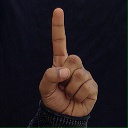

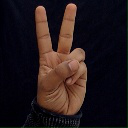

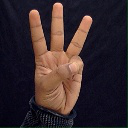

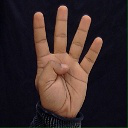

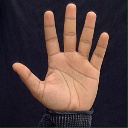

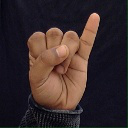

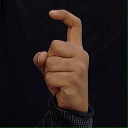

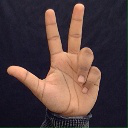

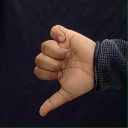

In [ ]:
#@title Q2.1 Displaying one random image from each class  
for i in range(9):
    img_n = random.choice(train_cl[i])
    img_loc = '/content/indianNumber/dataN/' + str(i + 1) + '/' + img_n
    im = Image.open(img_loc)
    im.show()   

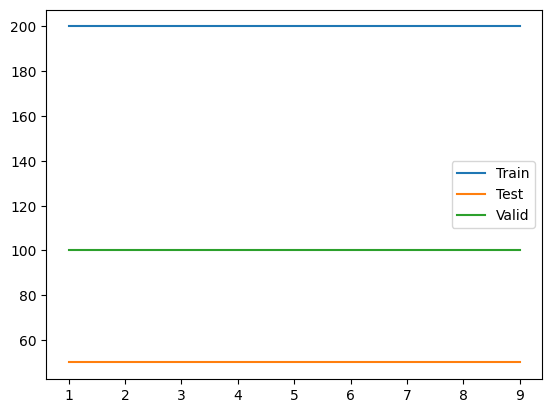

In [ ]:
#@title Q2.2 Plotting the distribution of images of each class 
classes = [i for i in range(1,10)]

ct_train = []
ct_test = []
ct_valid = []

for i in range(9):
    ct_train.append(len(train_cl[i]))
    ct_test.append(len(test_cl[i]))
    ct_valid.append(len(valid_cl[i]))
    
plt.plot(classes,ct_train,label = 'Train')
plt.plot(classes,ct_test,label = 'Test')
plt.plot(classes,ct_valid,label = 'Valid')
plt.legend()
plt.show()

Yes , we see that distribution uniform as each class has the same number of images.

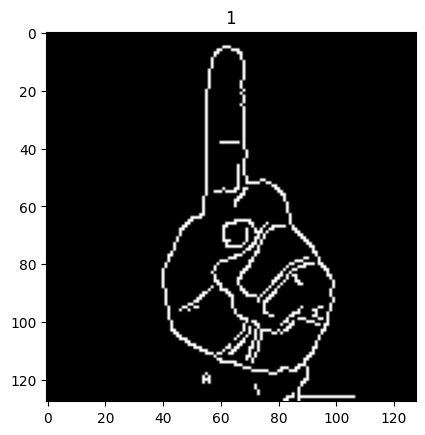

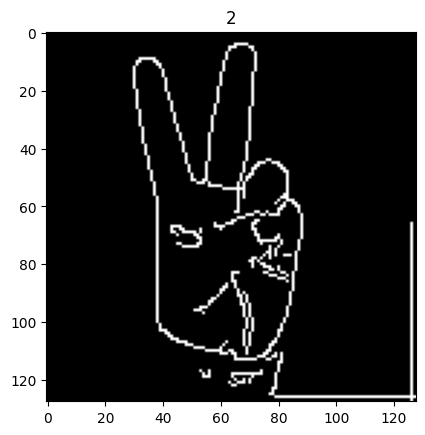

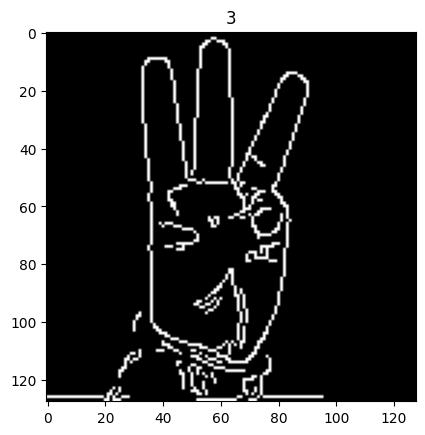

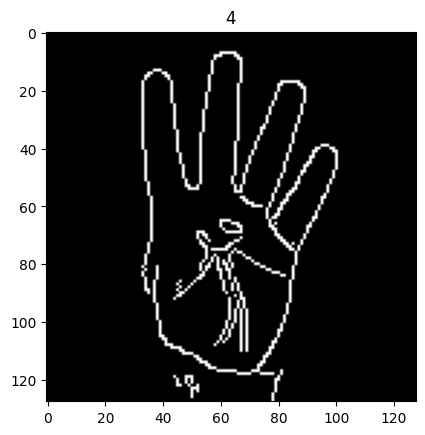

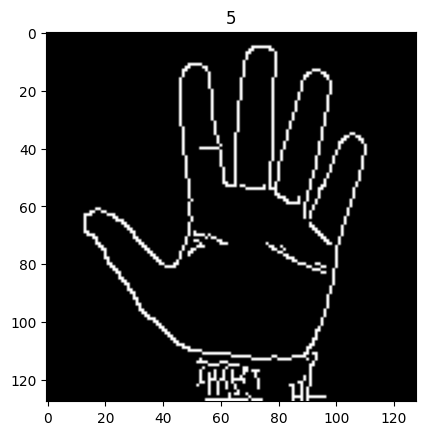

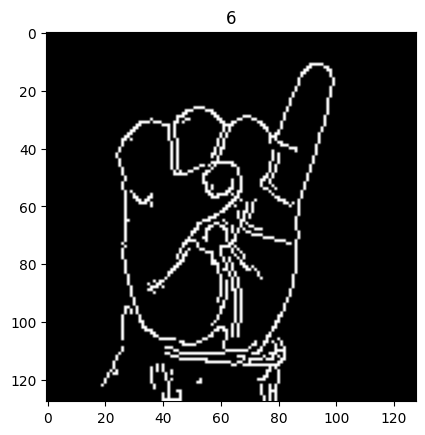

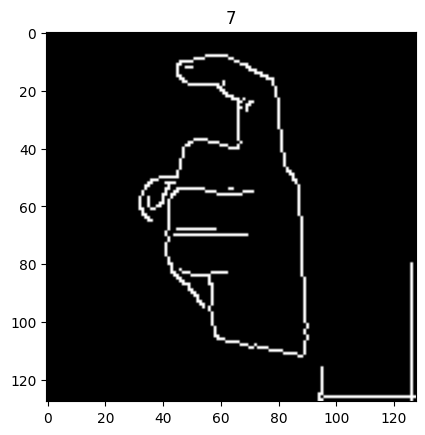

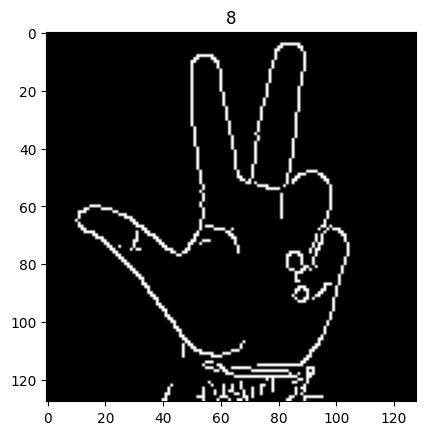

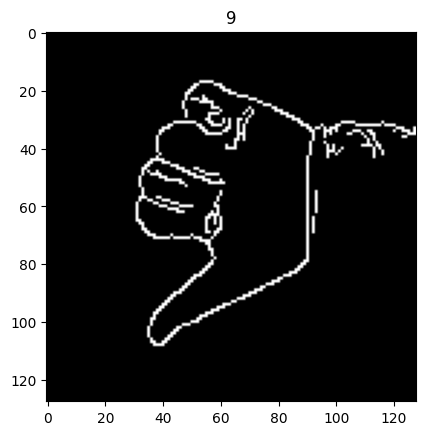

In [ ]:
#@title Q2.3 Canny Edge Detection on one random image from each class

for i in range(9):
    img_n = random.choice(train_cl[i])
    img_loc = '/content/indianNumber/dataN/' + str(i + 1) + '/' + img_n
    img = cv2.imread(img_loc)

    # Apply Canny
    edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

    plt.figure()
    plt.title(i + 1)
    plt.imshow(edges, cmap='gray')
    plt.show()

In [ ]:
#@title Q2.4 Implementing CNN Model using Keras 

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam, SGD, RMSprop, Adagrad

def create_model(input_shape, num_classes):
    model = tf.keras.Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(32, (3, 3), activation='relu', strides=2))
    model.add(Conv2D(24, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(24, (3, 3), activation='relu', strides=2))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    # model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.3))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


In [ ]:
#@title Loading training dataset
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/content/indianNumber/dataN/',
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 1800 images belonging to 9 classes.


In [ ]:
#@title Loading validation dataset 
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/valid_data/',
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 900 images belonging to 9 classes.


In [ ]:
#@title Loading testing dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory('/content/test_data/',
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 450 images belonging to 9 classes.


In [ ]:
#@title Model Summary

model = create_model(input_shape=(128, 128, 3), num_classes=9)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 24)        6

In [ ]:
#@title Training the model  on SGD optimizer (Test Run)
model = create_model(input_shape=(128, 128, 3), num_classes=9)
optimizer = SGD(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2, verbose=2)
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,verbose=2,callbacks=[early_stopping])


Epoch 1/50
57/57 - 15s - loss: 10.0643 - accuracy: 0.1122 - val_loss: 9.9599 - val_accuracy: 0.1111 - 15s/epoch - 255ms/step
Epoch 2/50
57/57 - 5s - loss: 9.7991 - accuracy: 0.1261 - val_loss: 9.8744 - val_accuracy: 0.1111 - 5s/epoch - 80ms/step
Epoch 3/50
57/57 - 3s - loss: 9.5992 - accuracy: 0.1661 - val_loss: 9.7874 - val_accuracy: 0.1578 - 3s/epoch - 56ms/step
Epoch 4/50
57/57 - 4s - loss: 9.4351 - accuracy: 0.2494 - val_loss: 9.6998 - val_accuracy: 0.1111 - 4s/epoch - 71ms/step
Epoch 5/50
57/57 - 3s - loss: 9.2748 - accuracy: 0.3700 - val_loss: 9.6050 - val_accuracy: 0.1111 - 3s/epoch - 61ms/step
Epoch 6/50
57/57 - 3s - loss: 9.1231 - accuracy: 0.4839 - val_loss: 9.4931 - val_accuracy: 0.1111 - 3s/epoch - 56ms/step
Epoch 7/50
57/57 - 3s - loss: 8.9813 - accuracy: 0.5744 - val_loss: 9.3471 - val_accuracy: 0.1467 - 3s/epoch - 55ms/step
Epoch 8/50
57/57 - 3s - loss: 8.8506 - accuracy: 0.6239 - val_loss: 9.1591 - val_accuracy: 0.4289 - 3s/epoch - 55ms/step
Epoch 9/50
57/57 - 6s - loss

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


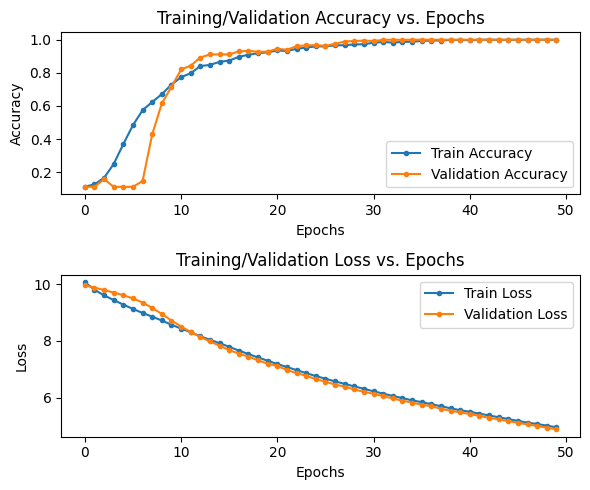

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 5))

ax[0].set_title('Training/Validation Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy',marker = '.')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy',marker = '.')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss',marker = '.')
ax[1].plot(val_loss, 'o-', label='Validation Loss', marker = '.')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
#@title Finding best learning rate
learning_rates = [0.001, 0.0001, 0.00001, 0.01]
histories_lr = []
for lr in learning_rates:
  print('Current learning rate is', lr)
  model = create_model(input_shape=(128, 128, 3), num_classes=9)
  early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2, verbose=2)
  model.compile(optimizer=Adam(learning_rate = lr), loss=CategoricalCrossentropy(), metrics=['accuracy'])
  history = model.fit(train_generator, epochs=50, validation_data=validation_generator,verbose=2,callbacks=[early_stopping])
  histories_lr.append(history)

Current learning rate is 0.001
Epoch 1/50
57/57 - 5s - loss: 6.5078 - accuracy: 0.6861 - val_loss: 5.4608 - val_accuracy: 0.1111 - 5s/epoch - 94ms/step
Epoch 2/50
57/57 - 3s - loss: 2.3832 - accuracy: 0.9972 - val_loss: 3.5594 - val_accuracy: 0.1111 - 3s/epoch - 53ms/step
Epoch 3/50
57/57 - 3s - loss: 1.0459 - accuracy: 1.0000 - val_loss: 2.8406 - val_accuracy: 0.1111 - 3s/epoch - 52ms/step
Epoch 4/50
57/57 - 3s - loss: 0.5955 - accuracy: 1.0000 - val_loss: 2.5853 - val_accuracy: 0.1111 - 3s/epoch - 60ms/step
Epoch 5/50
57/57 - 4s - loss: 0.4255 - accuracy: 1.0000 - val_loss: 2.3788 - val_accuracy: 0.2211 - 4s/epoch - 72ms/step
Epoch 6/50
57/57 - 3s - loss: 0.3517 - accuracy: 1.0000 - val_loss: 2.1005 - val_accuracy: 0.2222 - 3s/epoch - 56ms/step
Epoch 7/50
57/57 - 3s - loss: 0.3075 - accuracy: 1.0000 - val_loss: 1.6077 - val_accuracy: 0.3956 - 3s/epoch - 55ms/step
Epoch 8/50
57/57 - 3s - loss: 0.2742 - accuracy: 1.0000 - val_loss: 0.9314 - val_accuracy: 0.9933 - 3s/epoch - 60ms/step
E

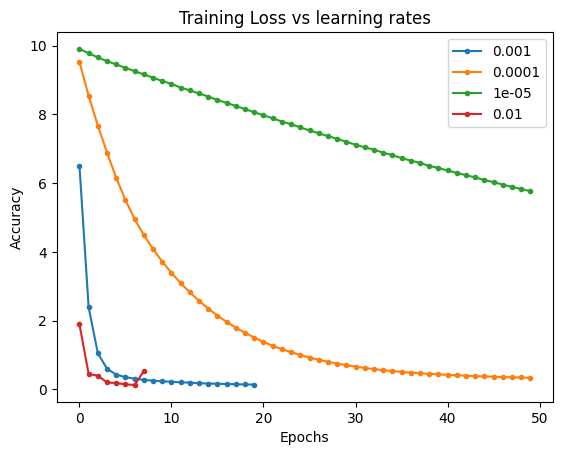

In [ ]:
#@title Plotting Training loss vs Epochs for different learning rates 

learning_rates = [0.001, 0.0001, 0.00001, 0.01]

plt.title('Training Loss vs learning rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for i in range(4):
  plt.plot(histories_lr[i].history['loss'],'o-',label = learning_rates[i],marker = '.')
plt.legend()
plt.show()



Best Learning Rate found = 0.01

In [ ]:
#@title Q2.6 Training the model  on different optimizers 
optimizers = [SGD(learning_rate=0.01),RMSprop(learning_rate=0.01),Adam(learning_rate=0.01),Adagrad(learning_rate=0.01)]
opt_names = ['SGD','RMSprop','Adam','Adagrad']
histories = []
for optim,opt_name in zip(optimizers,opt_names):
  print('Current Optimizer is', opt_name)
  print(optim)
  model = create_model(input_shape=(128, 128, 3), num_classes=9)
  early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2, verbose=2)
  model.compile(optimizer=optim, loss=CategoricalCrossentropy(), metrics=['accuracy'])
  history = model.fit(train_generator, epochs=50, validation_data=validation_generator,verbose=2,callbacks=[early_stopping])
  histories.append(history)

Current Optimizer is SGD
Epoch 1/50
57/57 - 7s - loss: 9.2613 - accuracy: 0.3883 - val_loss: 9.1419 - val_accuracy: 0.1111 - 7s/epoch - 121ms/step
Epoch 2/50
57/57 - 3s - loss: 7.9854 - accuracy: 0.7717 - val_loss: 8.4525 - val_accuracy: 0.1111 - 3s/epoch - 57ms/step
Epoch 3/50
57/57 - 3s - loss: 6.9555 - accuracy: 0.8822 - val_loss: 7.8448 - val_accuracy: 0.1022 - 3s/epoch - 57ms/step
Epoch 4/50
57/57 - 5s - loss: 6.0695 - accuracy: 0.9794 - val_loss: 7.2828 - val_accuracy: 0.1978 - 5s/epoch - 85ms/step
Epoch 5/50
57/57 - 3s - loss: 5.3012 - accuracy: 0.9978 - val_loss: 6.7272 - val_accuracy: 0.3100 - 3s/epoch - 61ms/step
Epoch 6/50
57/57 - 3s - loss: 4.7025 - accuracy: 0.9994 - val_loss: 6.0562 - val_accuracy: 0.4811 - 3s/epoch - 56ms/step
Epoch 7/50
57/57 - 3s - loss: 4.2128 - accuracy: 0.9994 - val_loss: 5.3297 - val_accuracy: 0.5944 - 3s/epoch - 57ms/step
Epoch 8/50
57/57 - 6s - loss: 3.7890 - accuracy: 1.0000 - val_loss: 4.5042 - val_accuracy: 0.8344 - 6s/epoch - 98ms/step
Epoch 

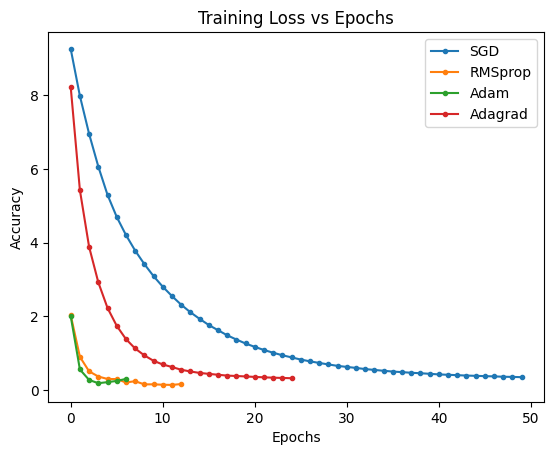

In [ ]:
#@title Plotting training loss for all the optimizers 
opt_names = ['SGD','RMSprop','Adam','Adagrad']

plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i in range(4):
  plt.plot(histories[i].history['loss'],'o-',label = opt_names[i],marker = '.')
plt.legend()
plt.show()

  

Note: Above the y-axis is Loss and not Accuracy

From above plot we can observe that the BEST optimizers are Adam and RMSprop. Both stopped much earlier than the fixed limit of 50 epochs. Adagrad stopped at 25 Epochs, while SGD did not stop at all. 

Between Adam and RMSProp we can see that Adam curve drops faster, but in the last epochs, the loss starts increasing. RMSProp has a more stable curve than Adam.

In [ ]:
#@title Q2.7 Varying Hyperparameters

# For varying hyperparameters we need a custom model 

def create_model_custom(input_shape, num_classes,conv_layers = 1,dropout = 0.3):
    model = tf.keras.Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    for i in range(conv_layers):
      model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(32, (3, 3), activation='relu', strides=2))
    model.add(Conv2D(24, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(24, (3, 3), activation='relu', strides=2))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    # model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(dropout))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


We are going to proceed with RMSProp optimizer for varying hyperparameters due to its fast and stable convergence. Learning Rate is taken as 0.01

In [ ]:
#@title Varying Dropout Rates

drop_rates = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
histories = []
test_acc = []
for dr in drop_rates:
  model = create_model_custom(input_shape=(128, 128, 3), num_classes=9,conv_layers = 1,dropout = dr)
  early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2, verbose=1)
  model.compile(optimizer=RMSprop(learning_rate=0.01),loss=CategoricalCrossentropy(), metrics=['accuracy'])
  history = model.fit(train_generator, epochs=15, validation_data=validation_generator,verbose=1)
  histories.append(history)
  score = model.evaluate(test_generator, batch_size = BATCH_SIZE)
  test_acc.append(score[1])

Epoch 1/15
57/57 [==============================] - 5s 71ms/step - loss: 2.3248 - accuracy: 0.3633 - val_loss: 17.5057 - val_accuracy: 0.1111
Epoch 2/15
57/57 [==============================] - 3s 57ms/step - loss: 1.2803 - accuracy: 0.5356 - val_loss: 11.6057 - val_accuracy: 0.1478
Epoch 3/15
57/57 [==============================] - 3s 54ms/step - loss: 1.0657 - accuracy: 0.6089 - val_loss: 16.9302 - val_accuracy: 0.1111
Epoch 4/15
57/57 [==============================] - 3s 55ms/step - loss: 0.8806 - accuracy: 0.7428 - val_loss: 7.4480 - val_accuracy: 0.2133
Epoch 5/15
57/57 [==============================] - 4s 68ms/step - loss: 0.6701 - accuracy: 0.8678 - val_loss: 1.7881 - val_accuracy: 0.4733
Epoch 6/15
57/57 [==============================] - 3s 55ms/step - loss: 0.5712 - accuracy: 0.9167 - val_loss: 2.6704 - val_accuracy: 0.5178
Epoch 7/15
57/57 [==============================] - 3s 55ms/step - loss: 0.4616 - accuracy: 0.9461 - val_loss: 0.6518 - val_accuracy: 0.8578
Epoch 8/15

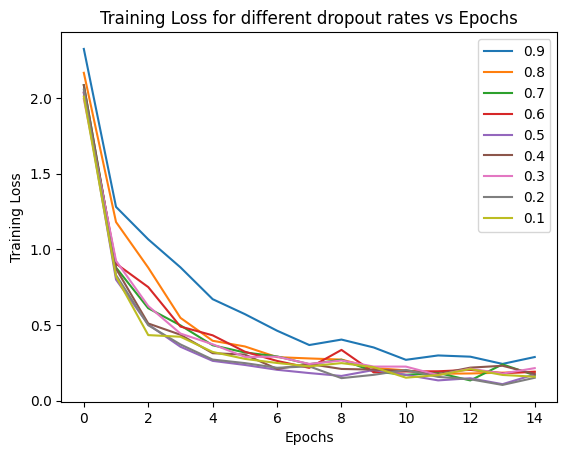

In [ ]:
#@title Training Loss for different dropout rates

plt.title('Training Loss for different dropout rates vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
for i in range(len(drop_rates)):
  plt.plot(histories[i].history['loss'],label = drop_rates[i])
plt.legend()
plt.show()

In general we can see that convergence is faster for lower dropout rates. Although at dropout rates <= 0.5 we cannot choose which one is the best as they are all very close together.

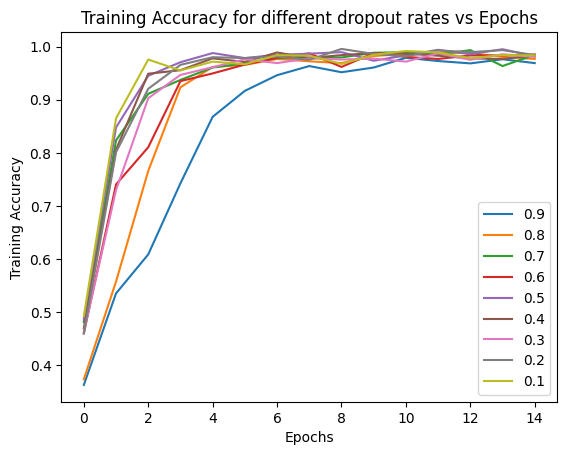

In [ ]:
#@title Training Accuracy for different dropout rates

plt.title('Training Accuracy for different dropout rates vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
for i in range(len(drop_rates)):
  plt.plot(histories[i].history['accuracy'],label = drop_rates[i])
plt.legend()
plt.show()

Again we can see that for 0.9 and 0.8 we have lower accuracy initially. However with enough epochs we see all of the accuracies tend to 1.

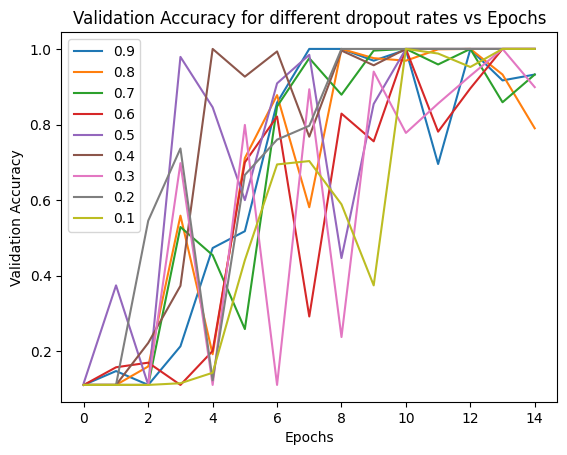

In [ ]:
#@title Validation Accuracy for different dropout rates

plt.title('Validation Accuracy for different dropout rates vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
for i in range(len(drop_rates)):
  plt.plot(histories[i].history['val_accuracy'],label = drop_rates[i])
plt.legend()
plt.show()

We cannot comment anything based on this plot.

In [ ]:
#@title Printing Testing Accuracies for different dropout rates

for i in range(len(drop_rates)):
  print('For dropout = ',drop_rates[i],', Testing Accuracy = ',test_acc[i])

For dropout =  0.9 , Testing Accuracy =  0.9311110973358154
For dropout =  0.8 , Testing Accuracy =  0.7888888716697693
For dropout =  0.7 , Testing Accuracy =  0.9399999976158142
For dropout =  0.6 , Testing Accuracy =  1.0
For dropout =  0.5 , Testing Accuracy =  1.0
For dropout =  0.4 , Testing Accuracy =  1.0
For dropout =  0.3 , Testing Accuracy =  0.9044444561004639
For dropout =  0.2 , Testing Accuracy =  1.0
For dropout =  0.1 , Testing Accuracy =  1.0


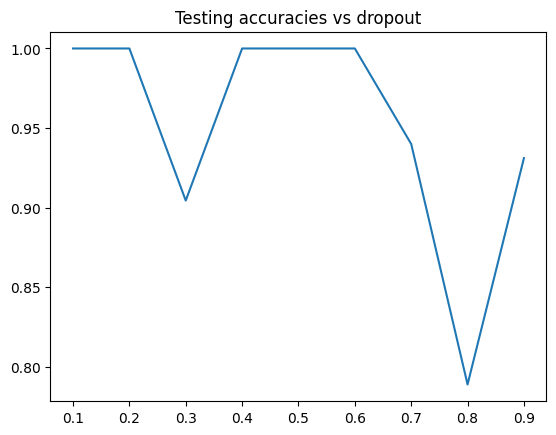

In [ ]:
#@title Plotting Test accuracies for different dropout rates 
plt.title('Testing accuracies vs dropout')
plt.plot(drop_rates,test_acc)
plt.show()

We get different results everytime we run this code, hence we cannot comment anything on this plot. 

In [ ]:
#@title Varying convolution layers (note: The initial model given in question corresponds to 1 Conv layer in my custom model)

conv_layer_list = [0,1,2,3,4,5,6,7,8,9]
histories = []
test_acc = []
for cl in conv_layer_list:
  model = create_model_custom(input_shape=(128, 128, 3), num_classes=9,conv_layers = cl,dropout = 0.3)
  early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2, verbose=1)
  model.compile(optimizer=RMSprop(learning_rate=0.01),loss=CategoricalCrossentropy(), metrics=['accuracy'])
  history = model.fit(train_generator, epochs=15, validation_data=test_generator,verbose=1)
  histories.append(history)
  score = model.evaluate(test_generator, batch_size = BATCH_SIZE)
  test_acc.append(score[1])

Epoch 1/15
57/57 [==============================] - 4s 47ms/step - loss: 2.0545 - accuracy: 0.4206 - val_loss: 11.7961 - val_accuracy: 0.1111
Epoch 2/15
57/57 [==============================] - 3s 52ms/step - loss: 0.9634 - accuracy: 0.7017 - val_loss: 3.7911 - val_accuracy: 0.2222
Epoch 3/15
57/57 [==============================] - 3s 46ms/step - loss: 0.6928 - accuracy: 0.8256 - val_loss: 1.0944 - val_accuracy: 0.7044
Epoch 4/15
57/57 [==============================] - 2s 41ms/step - loss: 0.5715 - accuracy: 0.8544 - val_loss: 2.2467 - val_accuracy: 0.4422
Epoch 5/15
57/57 [==============================] - 2s 40ms/step - loss: 0.4100 - accuracy: 0.9389 - val_loss: 1.6844 - val_accuracy: 0.6222
Epoch 6/15
57/57 [==============================] - 2s 41ms/step - loss: 0.3681 - accuracy: 0.9489 - val_loss: 1.5449 - val_accuracy: 0.6089
Epoch 7/15
57/57 [==============================] - 3s 56ms/step - loss: 0.2662 - accuracy: 0.9789 - val_loss: 0.1651 - val_accuracy: 1.0000
Epoch 8/15
5

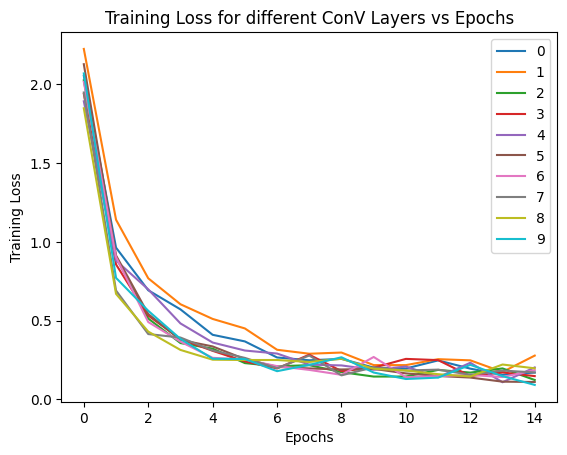

In [ ]:
#@title Training Loss for different ConV Layers

plt.title('Training Loss for different ConV Layers vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
for i in range(len(conv_layer_list)):
  plt.plot(histories[i].history['loss'],label = conv_layer_list[i])
plt.legend()
plt.show()

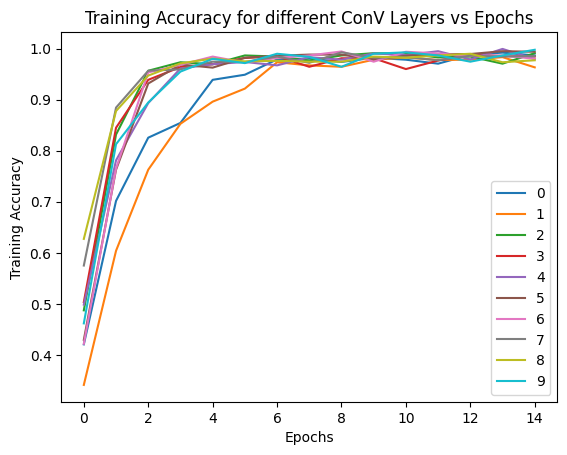

In [ ]:
#@title Training Accuracy for different ConV Layers

plt.title('Training Accuracy for different ConV Layers vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
for i in range(len(conv_layer_list)):
  plt.plot(histories[i].history['accuracy'],label = conv_layer_list[i])
plt.legend()
plt.show()

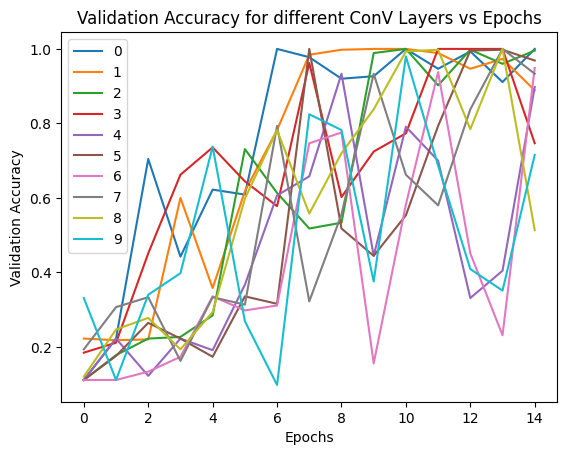

In [ ]:
#@title Validation Accuracy for different ConV Layers

plt.title('Validation Accuracy for different ConV Layers vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
for i in range(len(conv_layer_list)):
  plt.plot(histories[i].history['val_accuracy'],label = conv_layer_list[i])
plt.legend()
plt.show()

In [ ]:
#@title Printing Testing Accuracies 

for i in range(len(conv_layer_list)):
  print('For ConV Layers = ',conv_layer_list[i],', Testing Accuracy = ',test_acc[i])

For ConV Layers =  0 , Testing Accuracy =  1.0
For ConV Layers =  1 , Testing Accuracy =  0.8888888955116272
For ConV Layers =  2 , Testing Accuracy =  0.995555579662323
For ConV Layers =  3 , Testing Accuracy =  0.746666669845581
For ConV Layers =  4 , Testing Accuracy =  0.897777795791626
For ConV Layers =  5 , Testing Accuracy =  0.9688888788223267
For ConV Layers =  6 , Testing Accuracy =  0.948888897895813
For ConV Layers =  7 , Testing Accuracy =  0.9333333373069763
For ConV Layers =  8 , Testing Accuracy =  0.5133333206176758
For ConV Layers =  9 , Testing Accuracy =  0.7155555486679077


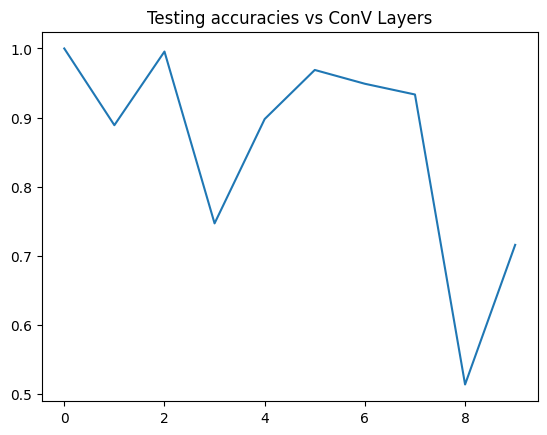

In [ ]:
# Plotting Test accuracies vs ConV Layers
plt.title('Testing accuracies vs ConV Layers')
plt.plot(conv_layer_list,test_acc)
plt.show()

Observations on varying Convolution Layers: 
Looking at Plots of Training Loss and Training Accuracy, all the lines are close to each other, but convergence does appear to be faster for more number of convolution layers.

However, looking at the plot of testing accuracy, we do not see better accuracy for more convolution layers. hence we cannot conclude anything about any trend.

It could be that more epochs would be required for better results. 